# Graphs

Graphing data...

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy.optimize import curve_fit

In [2]:
armadillos = np.loadtxt('data/armadillo.tsv', delimiter='\t')
crabs = np.loadtxt('data/crab.tsv', delimiter='\t')
crocs = np.loadtxt('data/croc.tsv', delimiter='\t')
goos = np.loadtxt('data/goo.tsv', delimiter='\t')
osnakes = np.loadtxt('data/osnake.tsv', delimiter='\t')
snakes = np.loadtxt('data/snake.tsv', delimiter='\t')

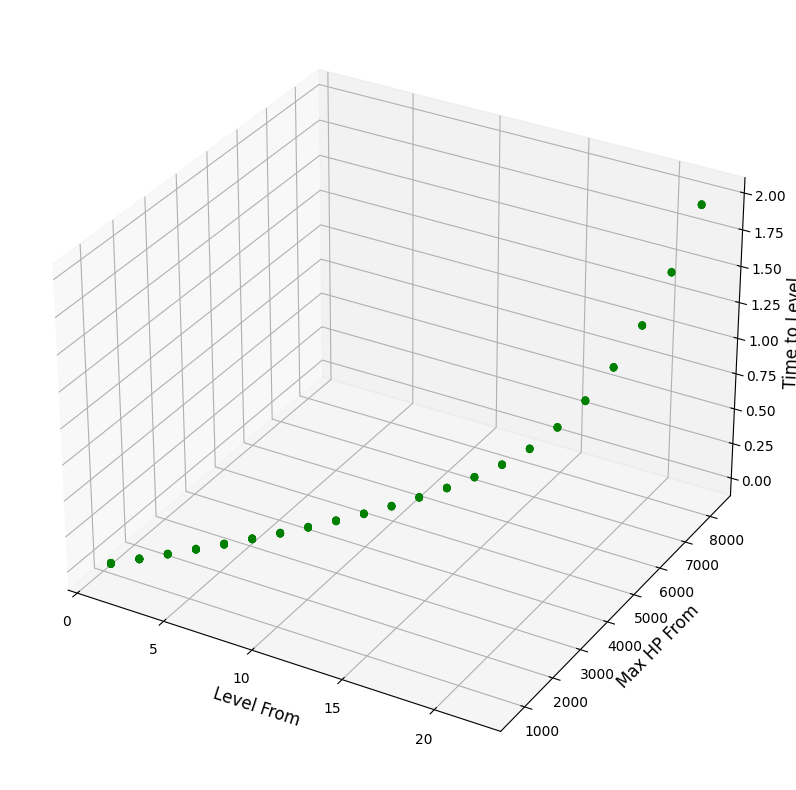

In [3]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

# ax.scatter3D(armadillos[:, 1], armadillos[:, 3], armadillos[:, 0], color='brown')
# ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
# ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
# ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
# ax.scatter3D(osnakes[:, 1], osnakes[:, 3], osnakes[:, 0], color='orange')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

plt.show()

In [4]:
def f(X, a, b, c, d, e, f):
    level, hp = X
    return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level)

X1 = np.concatenate((goos[:, 1], osnakes[:, 1], snakes[:, 1]))
X2 = np.concatenate((goos[:, 3], osnakes[:, 3], snakes[:, 3]))
Y = np.concatenate((goos[:, 0], osnakes[:, 0], snakes[:, 0]))

popt, pcov = curve_fit(f, (goos[:, 1], goos[:, 3]), goos[:, 0], bounds=(0, np.inf))

In [5]:
popt

array([2.23365661e-34, 7.55373021e-27, 1.69448469e+04, 5.06456801e-32,
       1.03381580e-09, 2.04336548e+00])

In [6]:
pcov

array([[ 1.25559795e+09, -1.25440504e+09,  1.25321146e+09,
         5.96453820e+07, -4.88349330e+05, -4.98061877e+01],
       [-1.25440504e+09,  1.25321328e+09, -1.25202084e+09,
        -5.95880279e+07,  4.87884531e+05,  4.97645405e+01],
       [ 1.25321146e+09, -1.25202084e+09,  1.25082955e+09,
         5.95306415e+07, -4.87419467e+05, -4.97228665e+01],
       [ 5.96453820e+07, -5.95880279e+07,  5.95306415e+07,
         2.86770429e+06, -2.32399793e+04, -2.08235925e+00],
       [-4.88349330e+05,  4.87884531e+05, -4.87419467e+05,
        -2.32399793e+04,  1.89992626e+02,  1.89085534e-02],
       [-4.98061877e+01,  4.97645405e+01, -4.97228665e+01,
        -2.08235925e+00,  1.89085534e-02,  1.09832461e-05]])

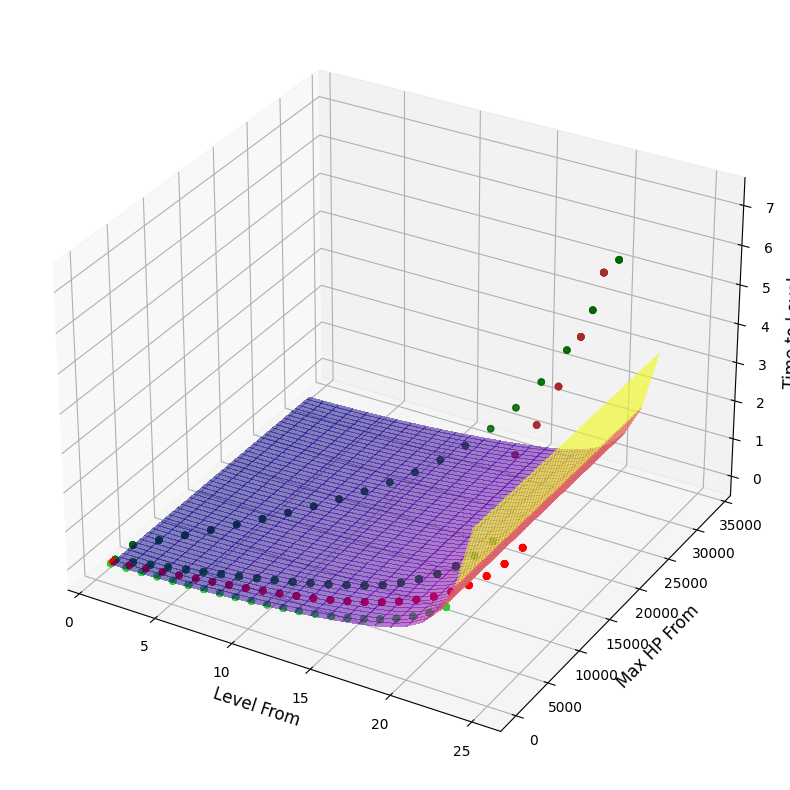

In [7]:
graph = plt.figure()
graph.set_figwidth(40)
graph.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(armadillos[:, 1], armadillos[:, 3], armadillos[:, 0], color='brown')
ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(osnakes[:, 1], osnakes[:, 3], osnakes[:, 0], color='orange')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')

LEVELS = np.arange(1, 25, 1)
MAX_HP = np.arange(100, 30000, 100)
X, Y = np.meshgrid(LEVELS, MAX_HP)
Z = f((X, Y), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma, alpha=0.5, linewidth=0, antialiased=False)

plt.show()